In [51]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=load_wine()
data=pd.DataFrame(df.data,columns=df.feature_names)
data['target']=df.target

# null and duplicate values
data.isnull().sum()
data.duplicated().sum()

#outlier detection
from scipy.stats import zscore
z_score=zscore(data)
outlier=data[(z_score>3).any(axis=1)]
data=data.drop(outlier.index)

In [52]:
#split the data
x=data.drop('target',axis=1)
y=data['target']

In [53]:
#feature selection (chi square)
from sklearn.feature_selection import SelectKBest,chi2

selector=SelectKBest(chi2,k=10)
selector.fit_transform(x,y)
k=selector.get_support()
selected_feature=x.columns[k]
x_new=data[selected_feature]

In [54]:
#saling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_new=scaler.fit_transform(x_new)
x_final=pd.DataFrame(x_new,columns=selected_feature)

In [55]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y,test_size=0.2,random_state=42)

In [56]:
#model selection and prediction
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



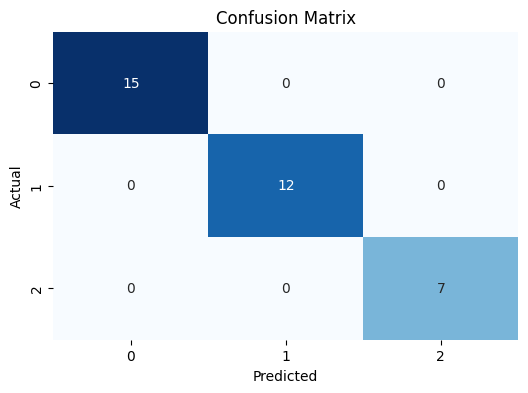

In [57]:
#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score,ConfusionMatrixDisplay

# Assuming y_test and y_pred are your true and predicted labels
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
